# Context
‣Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

‣Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

‣Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.


‣Age: Positive Integer variable of the reviewers age.


‣Title: String variable for the title of the review.


‣Review Text: String variable for the review body.


‣Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.


‣Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.


‣Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.


‣Division Name: Categorical name of the product high level division.
Department Name: Categorical name of the product department name.
Class Name: Categorical name of the product class name.


In [1]:
import pandas as pd
from textblob import TextBlob
import warnings

In [2]:
csv = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
csv

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
df1 = csv[['Department Name','Review Text','Rating']]

In [4]:
#lower case 

In [5]:
df1.columns

Index(['Department Name', 'Review Text', 'Rating'], dtype='object')

In [6]:
cols = []
for i in range(len(df1.columns)):
    cols.append(df1.columns[i].lower().replace(' ','_'))
df1.columns = cols
print(df1.columns)

Index(['department_name', 'review_text', 'rating'], dtype='object')


In [7]:
df1.head(20)

,department_name,review_text,rating
0,Intimate,Absolutely wonderful - silky and sexy and comf...,4
1,Dresses,Love this dress! it's sooo pretty. i happene...,5
2,Dresses,I had such high hopes for this dress and reall...,3
3,Bottoms,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Tops,This shirt is very flattering to all due to th...,5
5,Dresses,"I love tracy reese dresses, but this one is no...",2
6,Tops,I aded this in my basket at hte last mintue to...,5
7,Tops,"I ordered this in carbon for store pick up, an...",4
8,Dresses,I love this dress. i usually get an xs but it ...,5
9,Dresses,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5


In [68]:
df_new=df1.head(9)

In [69]:
 df_new

,department_name,review_text,rating
0,Intimate,Absolutely wonderful - silky and sexy and comf...,4
1,Dresses,Love this dress! it's sooo pretty. i happene...,5
2,Dresses,I had such high hopes for this dress and reall...,3
3,Bottoms,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Tops,This shirt is very flattering to all due to th...,5
5,Dresses,"I love tracy reese dresses, but this one is no...",2
6,Tops,I aded this in my basket at hte last mintue to...,5
7,Tops,"I ordered this in carbon for store pick up, an...",4
8,Dresses,I love this dress. i usually get an xs but it ...,5


In [8]:
Comment = TextBlob(df1.at[2, 'review_text'])

In [9]:
Comment.sentiment

Sentiment(polarity=0.07367494824016563, subjectivity=0.35629399585921323)

In [10]:
Comment = TextBlob(df1.at[3, 'review_text'])

In [11]:
Comment.sentiment

Sentiment(polarity=0.5499999999999999, subjectivity=0.625)

In [12]:
Comment = TextBlob('I love the look')
Comment.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [13]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [14]:
#df1['polarity'] = df1['review_text'].apply(sentiment).apply(lambda x:x[0]) # errors running

In [15]:
df1['review_text'].apply(sentiment)

0          (0.6333333333333333, 0.9333333333333332)
1         (0.33958333333333335, 0.7250000000000001)
2        (0.07367494824016563, 0.35629399585921323)
3                       (0.5499999999999999, 0.625)
4                            (0.512890625, 0.56875)
                            ...                    
23481                    (0.5526666666666668, 0.71)
23482     (0.09166666666666666, 0.7083333333333334)
23483      (0.4142857142857143, 0.5964285714285715)
23484      (0.3222222222222222, 0.5777777777777778)
23485      (0.4138888888888889, 0.7077777777777778)
Name: review_text, Length: 23486, dtype: object

In [16]:
type(df1['review_text'].apply(sentiment).iloc[0])

textblob.en.sentiments.Sentiment

In [17]:
df1['review_text'].apply(sentiment).iloc[0][1]

0.9333333333333332

In [ ]:
df1['subjectivity'] = df1['review_text'].apply(sentiment).apply(lambda x: np.Nan if x!=x else x[0])

In [19]:
df1.head()

,department_name,review_text,rating
0,Intimate,Absolutely wonderful - silky and sexy and comf...,4
1,Dresses,Love this dress! it's sooo pretty. i happene...,5
2,Dresses,I had such high hopes for this dress and reall...,3
3,Bottoms,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Tops,This shirt is very flattering to all due to th...,5


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   department_name  23472 non-null  object
 1   review_text      22641 non-null  object
 2   rating           23486 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 550.6+ KB


In [21]:
df1.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [22]:
df1.isna().sum()

department_name     14
review_text        845
rating               0
dtype: int64

In [23]:
df1['department_name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department_name, dtype: int64

In [24]:
df1['rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Visualization

<AxesSubplot:xlabel='department_name', ylabel='count'>

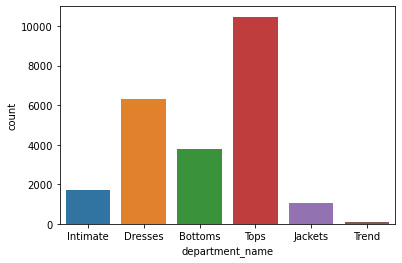

In [27]:
sns.countplot(df1['department_name'])

<AxesSubplot:xlabel='rating', ylabel='count'>

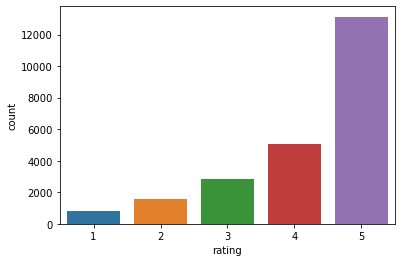

In [28]:
sns.countplot(df1['rating'])

In [29]:
rating_df = (df1.groupby(["department_name"])["rating"].mean())
rating_df

department_name
Bottoms     4.288760
Dresses     4.150815
Intimate    4.280115
Jackets     4.264535
Tops        4.172239
Trend       3.815126
Name: rating, dtype: float64

In [31]:
pip install wordcloud

     |████████████████████████████████| 220 kB 2.1 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158006 sha256=9febe6fad2119b391c8e856554e6458237bc55f62180de0318fbff48a4af08c5
  Stored in directory: /Users/petergeorge/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [44]:
df1['review_text'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review_text, Length: 23486, dtype: object>

In [46]:
from wordcloud import wordcloud

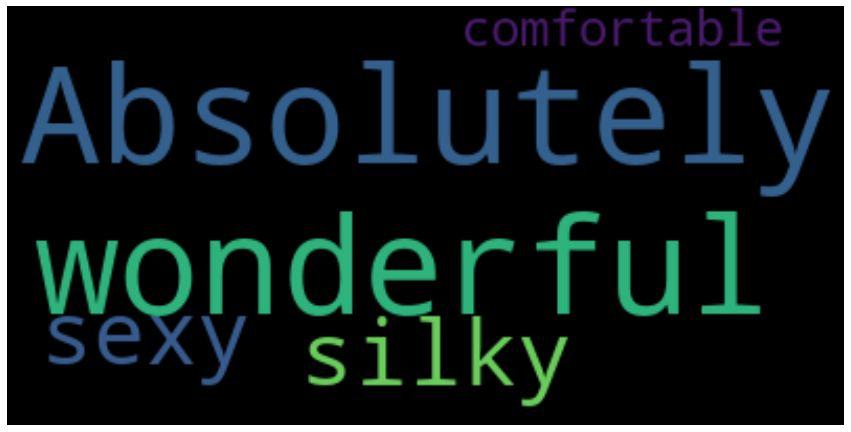

In [51]:
# Start with one review:
text = df1.review_text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

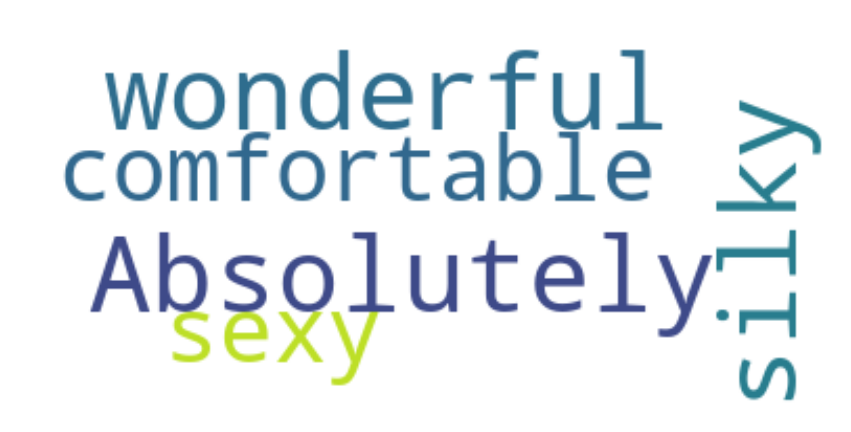

In [54]:
# lower max_font_size, change the maximum number of word and lighten the background:
# Start with one review:
text = df1.review_text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### save the first review to a file 

In [56]:
wordcloud.to_file("first_review.png")

In [72]:
text = " ".join(review for review in df_new.review_text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2812 words in the combination of all review.


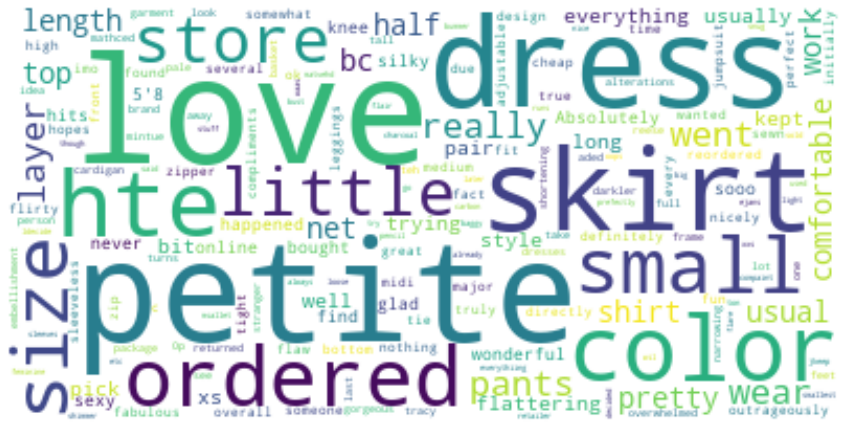

In [74]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["shame"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [75]:
wordcloud.to_file("eight_sampled.png")